In [1]:
from __future__ import print_function
import os,re,time,sys,os,math,random,time,pickle,keras,graphviz
import pydot_ng as pydot
import pydot
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow.contrib import rnn
import numpy as np
import pandas as pd
from keras import backend as K
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM,Flatten,Dense,Embedding
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
%matplotlib inline
from sklearn.model_selection import train_test_split as split
start = time.time()

c:\program files\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
if os.name != 'posix':
    f = open(r'M:\Course stuff\ASPRI\data\PCH\paths\11012018.txt','r')
else:
    f = open('../data/PCH/paths/11012018.txt','r')
lines = f.readlines()
lines = [i.strip() for i in lines]

In [3]:
if os.name != 'posix':
    final_embeddings = pickle.load(open(r'M:\Course stuff\ASPRI\supervised\loal_FE','rb'))
    dictionary = pickle.load(open(r'M:\Course stuff\ASPRI\supervised\dictionary','rb'))
    reverse_dictionary = pickle.load(open(r'M:\Course stuff\ASPRI\supervised\reverse_dictionary','rb'))
    count = pickle.load(open(r'M:\Course stuff\ASPRI\supervised\count','rb'))
else:
    final_embeddings = pickle.load(open('loal_FE','rb'))
    dictionary = pickle.load(open('dictionary','rb'))
    reverse_dictionary = pickle.load(open('reverse_dictionary','rb'))
    count = pickle.load(open('count','rb'))
print(type(final_embeddings),type(dictionary),type(reverse_dictionary),type(count))

<class 'numpy.ndarray'> <class 'dict'> <class 'dict'> <class 'list'>


In [4]:
nd_array = []
for i in range(30):
    nd_array.append(np.zeros(shape = (32,1)))

In [5]:
len(nd_array)

30

In [6]:
new_array = []
for i in range(len(lines)):
    new_array.append(nd_array)
new_array = np.asarray(new_array)

In [7]:
for i in range(len(lines)):
    splits = lines[i].split(' ')
    for j in range(len(splits)):
        #print(new_array[i][j])
        new_array[i,j] = final_embeddings[dictionary[str(splits[j])]-1].reshape(32,1)

In [8]:
new_array[0][0].shape

(32, 1)

In [9]:
if os.name != 'posix':
    paths = pd.read_csv(r'M:\Course stuff\ASPRI\supervised\11012018.csv',sep='\t',low_memory = False,index_col = False)
else:
    paths = pd.read_csv('11012018.csv',sep='\t',low_memory = False,index_col = False)
    del paths['Unnamed: 0']
paths.head()

,Unnamed: 0,Paths,Fake
0,0,6939 4826 38803 56203,0.0
1,1,6939 4826 38803 56203,0.0
2,2,6939 4826 38803 56203,0.0
3,3,6939 4826 38803 56203,0.0
4,4,6939 4826 38803 56203,0.0


In [10]:
train,test = split(paths,test_size = 0.3)

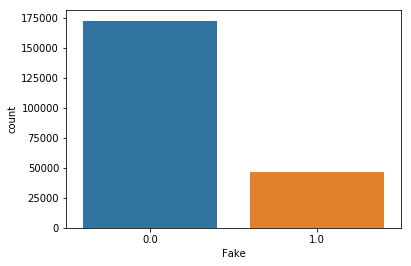

In [11]:
sns.countplot(x = 'Fake',data = train)

In [12]:
train.Fake.value_counts()

0.0    172666
1.0     46290
Name: Fake, dtype: int64

In [13]:
test.Fake.value_counts()

0.0    73664
1.0    20175
Name: Fake, dtype: int64

In [14]:
max_length = 30
vocab_size = 24612 #unique tokens for this file
#encoded_train = [one_hot(d,vocab_size) for d in train['Paths']]
#encoded_test = [one_hot(d,vocab_size) for d in test['Paths']]

In [15]:
def encode_lines(arr):
    # function works on df
    # iterate over lines in df
    # iterate over splits of line
    # convert split word to embedding vector (32,1)
    # pad with (32,1) zeros
    
    
    new_array = []
    for i in range(len(arr)):
        new_array.append(nd_array)
    new_array = np.asarray(new_array)
    c = 0
    for i in arr['Paths']:
        splits = i.split(' ')
        for j in range(len(splits)):
            #print(new_array[i][j])
            new_array[c,j] = final_embeddings[dictionary[str(splits[j])]-1].reshape(32,1)
        c += 1
    assert(len(new_array) == len(arr))
    assert(len(new_array[0]) == 30)
    return new_array
encoded_train = encode_lines(train)

In [16]:
len(encoded_train)

218956

In [17]:
encoded_test = encode_lines(test)

In [18]:
train_lengths = [len(t) for t in encoded_train] #array of lengths so we can pad zeros later
test_lengths= [len(t) for t in encoded_test] #array of lengths for test set to be padded later

In [19]:
y_test,y_train = test['Fake'],train['Fake']

In [20]:
x_train = encode_lines(train)#['Paths'])
x_test = encode_lines(test)#['Paths'])

In [21]:
max_length = 30
vocab_size = 24612 #unique tokens for this file
encoded_train = [one_hot(d,vocab_size) for d in train['Paths']]
encoded_test = [one_hot(d,vocab_size) for d in test['Paths']]
train_lengths = [len(t) for t in encoded_train] #array of lengths so we can pad zeros later
test_lengths= [len(t) for t in encoded_test] #array of lengths for test set to be padded later

In [22]:
labels_train = train['Fake']
train_dic={}
train_dic["data"] = encoded_train
train_dic["labels"] = labels_train#labels_train[0].ravel().tolist()
train_dic["length"] = train_lengths
train_len = len(train)
test_len = len(test)

train_ = pd.DataFrame.from_dict(data=train_dic, orient='columns', dtype=None)



test_dic={}
test_dic["data"] = encoded_test
test_dic["length"] = test_lengths
test_dic["labels"] = test['Fake']
test_ = pd.DataFrame.from_dict(data=test_dic, orient='columns', dtype=None)

test_input = test.values

In [23]:
x_train, x_test = train_["data"],test_["data"]
y_train,y_test = train['Fake'],test['Fake']

In [24]:
max_features = vocab_size
maxlen = 30  # cut texts after this number of words (among top max_features most common words)
batch_size = 128
epochs = 5 #training steps
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

218956 train sequences
93839 test sequences
Pad sequences (samples x time)
x_train shape: (218956, 30)
x_test shape: (93839, 30)


In [25]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(30, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
score_lstm_sigmoid_FC, acc_lstm_sigmoid_FC = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score_lstm_sigmoid_FC)
print('Test accuracy:', acc_lstm_sigmoid_FC)

Build model...
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          787584    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7560      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 795,175
Trainable params: 795,175
Non-trainable params: 0
_________________________________________________________________
Train...
Train on 218956 samples, validate on 93839 samples
Epoch 1/5
218956/218956 [==============================] - 145s - loss: 0.2426 - acc: 0.9218 - val_loss: 0.1476 - val_acc: 0.9605
Epoch 2/5
218956/218956 [========================

In [26]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(keras.layers.GRU(30, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
score_gru_sigmoid_FC, acc_gru_sigmoid_FC = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score_gru_sigmoid_FC)
print('Test accuracy:', acc_gru_sigmoid_FC)

Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          787584    
_________________________________________________________________
gru_1 (GRU)                  (None, 30)                5670      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 793,285
Trainable params: 793,285
Non-trainable params: 0
_________________________________________________________________
Train...
Train on 218956 samples, validate on 93839 samples
Epoch 1/5
218956/218956 [==============================] - 127s - loss: 0.2178 - acc: 0.9351 - val_loss: 0.1509 - val_acc: 0.9610
Epoch 2/5
218956/218956 [==============================] - 130s - loss: 0.1403 - acc: 0.9627 - val_loss: 0.1472 - val_acc: 0.9601
Epoch 3/5
218956/218956 [==============================] - 132s -

In [28]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(30, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='tanh'))
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
print('Train...')
model.fit(x_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          validation_data = (x_test, y_test))
score_lstm_tanh_FC, acc_lstm_tanh_FC = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score_lstm_tanh_FC)
print('Test accuracy:', acc_lstm_tanh_FC)

Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          787584    
_________________________________________________________________
lstm_2 (LSTM)                (None, 30)                7560      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 795,175
Trainable params: 795,175
Non-trainable params: 0
_________________________________________________________________
Train...
Train on 218956 samples, validate on 93839 samples
Epoch 1/5
218956/218956 [==============================] - 138s - loss: 0.3509 - acc: 0.8794 - val_loss: 0.2650 - val_acc: 0.9057
Epoch 2/5
218956/218956 [==============================] - 146s - loss: 0.2559 - acc: 0.9278 - val_loss: 0.2475 - val_acc: 0.9395
Epoch 3/5
218956/218956 [==============================] - 161s -

In [29]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(30, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='relu'))
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
score_lstm_relu_FC, acc_lstm_relu_FC = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score_lstm_relu_FC)
print('Test accuracy:', acc_lstm_relu_FC)

Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          787584    
_________________________________________________________________
lstm_3 (LSTM)                (None, 30)                7560      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 795,175
Trainable params: 795,175
Non-trainable params: 0
_________________________________________________________________
Train...
Train on 218956 samples, validate on 93839 samples
Epoch 1/5
218956/218956 [==============================] - 147s - loss: 0.3522 - acc: 0.8615 - val_loss: 0.2771 - val_acc: 0.8566
Epoch 2/5
218956/218956 [==============================] - 143s - loss: 0.2446 - acc: 0.8729 - val_loss: 0.2034 - val_acc: 0.8544
Epoch 3/5
218956/218956 [==============================] - 144s -

In [30]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(30, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='elu'))
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
score_lstm_elu_FC, acc_lstm_elu_FC = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score_lstm_elu_FC)
print('Test accuracy:', acc_lstm_elu_FC)

Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          787584    
_________________________________________________________________
lstm_4 (LSTM)                (None, 30)                7560      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 795,175
Trainable params: 795,175
Non-trainable params: 0
_________________________________________________________________
Train...
Train on 218956 samples, validate on 93839 samples
Epoch 1/5
218956/218956 [==============================] - 146s - loss: 0.3728 - acc: 0.8505 - val_loss: 0.3000 - val_acc: 0.8458
Epoch 2/5
218956/218956 [==============================] - 144s - loss: 0.2858 - acc: 0.8629 - val_loss: 0.2471 - val_acc: 0.8682
Epoch 3/5
218956/218956 [==============================] - 145s -

In [31]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(30, dropout=0.2, recurrent_dropout=0.2))
#model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='relu'))
model.add(Dense(1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
score_lstm_3FC_02dropout, acc_lstm_3FC_02dropout = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score_lstm_3FC_02dropout)
print('Test accuracy:', acc_lstm_3FC_02dropout)

Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          787584    
_________________________________________________________________
lstm_5 (LSTM)                (None, 30)                7560      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 31        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 2         
Total params: 795,179
Trainable params: 795,179
Non-trainable params: 0
_________________________________________________________________
Train...
Train on 218956 samples, validate on 93839 samples
Epoch 1/5
218956/218956 [==============================] - 14

In [32]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(30, dropout=0.8, recurrent_dropout=0.2))
model.add(Dense(1, activation='relu'))
model.add(Dense(1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs= epochs,
          validation_data=(x_test, y_test))
score_lstm_3FC, acc_lstm_3FC = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score_lstm_3FC)
print('Test accuracy:', acc_lstm_3FC)

Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 32)          787584    
_________________________________________________________________
lstm_6 (LSTM)                (None, 30)                7560      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 31        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 2         
Total params: 795,179
Trainable params: 795,179
Non-trainable params: 0
_________________________________________________________________
Train...
Train on 218956 samples, validate on 93839 samples
Epoch 1/5
218956/218956 [==============================] - 14

In [33]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(30, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dense(1, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dense(1, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs = epochs,
          validation_data=(x_test, y_test))
score_lstm_3FC_bn, acc_lstm_3FC_bn = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score_lstm_3FC_bn)
print('Test accuracy:', acc_lstm_3FC_bn)

Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 32)          787584    
_________________________________________________________________
lstm_7 (LSTM)                (None, 30)                7560      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 31        
_________________________________________________________________
batch_normalization_1 (Batch (None, 1)                 4         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 2         
_________________________________________________________________
batch_normalization_2 (Batch (None, 1)                 4         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 2     

In [34]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(keras.layers.GRU(30, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dense(1, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dense(1, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs = epochs,
          validation_data=(x_test, y_test))
score_gru_3FC_bn, acc_gru_3FC_bn = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score_gru_3FC_bn)
print('Test accuracy:', acc_gru_3FC_bn)

Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 32)          787584    
_________________________________________________________________
gru_3 (GRU)                  (None, 30)                5670      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 31        
_________________________________________________________________
batch_normalization_4 (Batch (None, 1)                 4         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 2         
_________________________________________________________________
batch_normalization_5 (Batch (None, 1)                 4         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 2     

LSTM with sigmoid FC  =  0.9622225300781125 

GRU with sigmoid FC  =  0.9615618239751063 

LSTM with tanh FC  =  0.952983301186074 

LSTM with relu FC  =  0.810142904338691 

LSTM with elu FC  =  0.8323404980903252 

Denser LSTM with 0.2 dropout  =  0.7850041027749446 

Denser LSTM with 0.8 dropout  =  0.7850041027749446 

Denser LSTM with 0.2 dropout and batchnorm  =  0.8461727000526265 

Denser GRU with 0.2 dropout and batchnorm  =  0.962190560427967 



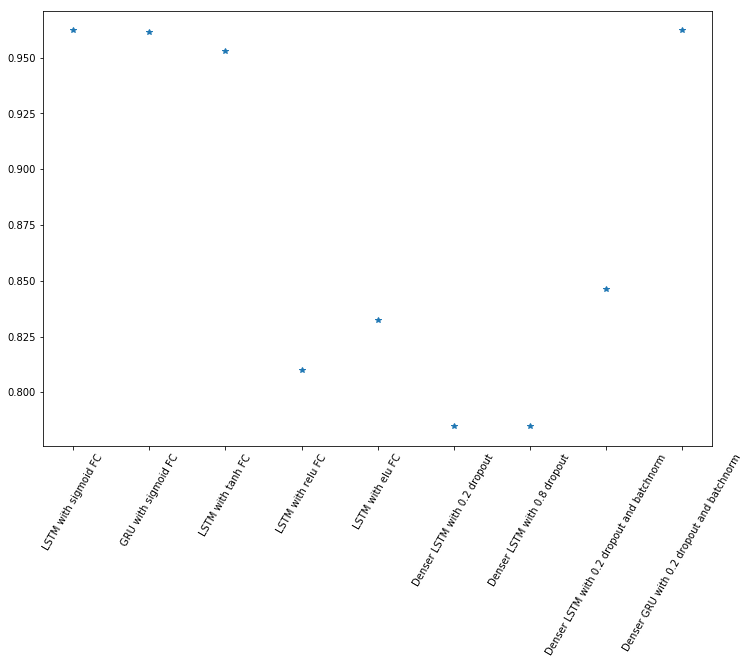

time taken for running the notebook:
 1.0 hours, 54.0 minutes and 54.79734396934509 seconds


In [35]:
#acc_gru_3FC_bn = 0.966
names = ['LSTM with sigmoid FC',
         'GRU with sigmoid FC',
         'LSTM with tanh FC',
         'LSTM with relu FC', 
         'LSTM with elu FC',
         'Denser LSTM with 0.2 dropout',
         'Denser LSTM with 0.8 dropout',
         'Denser LSTM with 0.2 dropout and batchnorm',
        'Denser GRU with 0.2 dropout and batchnorm']
accs = [acc_lstm_sigmoid_FC,
        acc_gru_sigmoid_FC,
        acc_lstm_tanh_FC,
        acc_lstm_relu_FC,
        acc_lstm_elu_FC,
        acc_lstm_3FC_02dropout,
        acc_lstm_3FC,
        acc_lstm_3FC_bn,
       acc_gru_3FC_bn]
for i in range(len(names)):
    print(names[i]," = ", accs[i],"\n" )
x = [i for i in range(len(names))]
plt.figure(figsize=(12,8))
pl.xticks(x, names)
pl.xticks(range(len(names)), names, rotation=60) #writes strings with 45 degree angle
pl.plot(x,accs,'*')
pl.show()
end = time.time()
seconds = end - start
minutes = seconds//60
seconds = seconds % 60
hours = 0
if minutes > 60:
    hours = minutes//60
    minutes = minutes%60
print("time taken for running the notebook:\n {0} hours, {1} minutes and {2} seconds".format(hours,minutes,seconds))

In [36]:
### search for hyperparameters ###

### IN THIS BLOCK ###

## TO CHECK: RECURRENT DROPOUT RATE ##

# CHECK 0.2, 0.8 #


print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(30, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
score_lstm_sigmoid_FC, acc_lstm_sigmoid_FC = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score_lstm_sigmoid_FC)
print('Test accuracy:', acc_lstm_sigmoid_FC)
print('Build model...')

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(30, dropout=0.2, recurrent_dropout=0.8))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
score_lstm_sigmoid_FC, acc_lstm_sigmoid_FC = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score_lstm_sigmoid_FC)
print('Test accuracy:', acc_lstm_sigmoid_FC)

Build model...
Train...
Train on 218956 samples, validate on 93839 samples
Epoch 1/5
218956/218956 [==============================] - 148s - loss: 0.2430 - acc: 0.9210 - val_loss: 0.1471 - val_acc: 0.9602
Epoch 2/5
218956/218956 [==============================] - 146s - loss: 0.1405 - acc: 0.9620 - val_loss: 0.1413 - val_acc: 0.9620
Epoch 3/5
218956/218956 [==============================] - 144s - loss: 0.1304 - acc: 0.9641 - val_loss: 0.1440 - val_acc: 0.9619
Epoch 4/5
218956/218956 [==============================] - 144s - loss: 0.1253 - acc: 0.9647 - val_loss: 0.1479 - val_acc: 0.9618
Epoch 5/5
93696/93839 [============================>.] - ETA: 0sTest score: 0.15129417664343234
Test accuracy: 0.9616044501753003
Build model...
Train...
Train on 218956 samples, validate on 93839 samples
Epoch 1/5
218956/218956 [==============================] - 147s - loss: 0.3076 - acc: 0.8938 - val_loss: 0.1874 - val_acc: 0.9477
Epoch 2/5
218956/218956 [==============================] - 144s - loss

In [37]:
### search for hyperparameters ###

### IN THIS BLOCK ###

## TO CHECK: number of LSTM units ##
# already have: 128 in github. 30 in this notebook #
# CHECK 64 #


print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
score_lstm_sigmoid_FC, acc_lstm_sigmoid_FC = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score_lstm_sigmoid_FC)
print('Test accuracy:', acc_lstm_sigmoid_FC)
print('Build model...')

Build model...
Train...
Train on 218956 samples, validate on 93839 samples
Epoch 1/5
218956/218956 [==============================] - 167s - loss: 0.2306 - acc: 0.9260 - val_loss: 0.1465 - val_acc: 0.9606
Epoch 2/5
218956/218956 [==============================] - 164s - loss: 0.1375 - acc: 0.9630 - val_loss: 0.1400 - val_acc: 0.9623
Epoch 3/5
218956/218956 [==============================] - 164s - loss: 0.1290 - acc: 0.9645 - val_loss: 0.1437 - val_acc: 0.9621
Epoch 4/5
218956/218956 [==============================] - 164s - loss: 0.1240 - acc: 0.9651 - val_loss: 0.1462 - val_acc: 0.9622
Epoch 5/5
93839/93839 [==============================] - 17s    
Test score: 0.15075726445648502
Test accuracy: 0.9621159645776276
Build model...


In [48]:
if os.name != 'posix':
    final_embeddings = pickle.load(open(r'M:\Course stuff\ASPRI\supervised\loal_FE','rb'))
    dictionary = pickle.load(open(r'M:\Course stuff\ASPRI\supervised\dictionary','rb'))
    reverse_dictionary = pickle.load(open(r'M:\Course stuff\ASPRI\supervised\reverse_dictionary','rb'))
    count = pickle.load(open(r'M:\Course stuff\ASPRI\supervised\count','rb'))
else:
    final_embeddings = pickle.load(open('loal_FE','rb'))
    dictionary = pickle.load(open('dictionary','rb'))
    reverse_dictionary = pickle.load(open('reverse_dictionary','rb'))
    count = pickle.load(open('count','rb'))
print(type(final_embeddings),type(dictionary),type(reverse_dictionary),type(count))

<class 'numpy.ndarray'> <class 'dict'> <class 'dict'> <class 'list'>


In [58]:
encoded_train[0]

[6338, 9583, 16843, 16843]

In [52]:
len(dictionary)

24617

In [55]:
dictionary_ = dictionary.copy()

In [56]:
del dictionary['UNK']

In [57]:
len(dictionary)

24616

In [60]:
reverse_dictionary[6338]

'51218'

In [61]:
embedding_matrix = {}
for i in list(reverse_dictionary.keys()):
    embedding_matrix[i] = final_embeddings[i-1]

In [63]:
final_embeddings.shape

(24616, 32)

In [79]:
embedding_matrix = np.zeros((len(dictionary), 32))
for i in list(reverse_dictionary.keys()):
    embedding_vector = final_embeddings[i-1]#.reshape((32,1))
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i-1] = embedding_vector    

In [69]:
len(embedding_matrix)

24616

In [70]:
final_embeddings[6338]

array([-0.00509059, -0.1217261 ,  0.09797727, -0.12125774,  0.12365056,
        0.1939962 ,  0.15530343,  0.16010445, -0.05775205,  0.01387483,
        0.01254192,  0.13052085, -0.08905942,  0.10333601, -0.2506293 ,
        0.26715744,  0.24938019,  0.03133765,  0.30514485, -0.23772131,
       -0.03991247,  0.29453826, -0.19590616,  0.33119026,  0.07087544,
       -0.28860688,  0.05331763,  0.11969152,  0.21679501, -0.25569105,
        0.11104064, -0.07249188], dtype=float32)

In [71]:
embedding_matrix[6338]

array([-0.00509059, -0.1217261 ,  0.09797727, -0.12125774,  0.12365056,
        0.19399621,  0.15530343,  0.16010445, -0.05775205,  0.01387483,
        0.01254192,  0.13052085, -0.08905942,  0.10333601, -0.25062931,
        0.26715744,  0.24938019,  0.03133765,  0.30514485, -0.23772131,
       -0.03991247,  0.29453826, -0.19590616,  0.33119026,  0.07087544,
       -0.28860688,  0.05331763,  0.11969152,  0.21679501, -0.25569105,
        0.11104064, -0.07249188])

In [75]:
print('Build model...')
model = Sequential()
model.add(Embedding(len(embedding_matrix), 32,weights = [embedding_matrix],trainable = False))
model.add(LSTM(30, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
score_lstm_sigmoid_FC, acc_lstm_sigmoid_FC = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score_lstm_sigmoid_FC)
print('Test accuracy:', acc_lstm_sigmoid_FC)

Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, None, 32)          787712    
_________________________________________________________________
lstm_14 (LSTM)               (None, 30)                7560      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 31        
Total params: 795,303
Trainable params: 7,591
Non-trainable params: 787,712
_________________________________________________________________
Train...
Train on 218956 samples, validate on 93839 samples
Epoch 1/5
218956/218956 [==============================] - 144s - loss: 0.3975 - acc: 0.8567 - val_loss: 0.3118 - val_acc: 0.8968
Epoch 2/5
218956/218956 [==============================] - 144s - loss: 0.2899 - acc: 0.9038 - val_loss: 0.2498 - val_acc: 0.9207
Epoch 3/5
218956/218956 [==============================] - 12

In [94]:
#from keras.layers import TimeDistributed
print('Building w2v embedding model with denser (16 units) FC layer ...')
model = Sequential()
model.add(Embedding(len(embedding_matrix), 32,weights = [embedding_matrix],trainable = False))
model.add(LSTM(30, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
score_lstm_sigmoid_FC, acc_lstm_sigmoid_FC = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score_lstm_sigmoid_FC)
print('Test accuracy:', acc_lstm_sigmoid_FC)
## Adding a FC layer did not help but hurt both in terms of training and validation accuracies

Building w2v embedding model with denser (16 units) FC layer ...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_40 (Embedding)     (None, None, 32)          787712    
_________________________________________________________________
lstm_31 (LSTM)               (None, 30)                7560      
_________________________________________________________________
dense_39 (Dense)             (None, 16)                496       
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 17        
Total params: 795,785
Trainable params: 8,073
Non-trainable params: 787,712
_________________________________________________________________
Train...
Train on 218956 samples, validate on 93839 samples
Epoch 1/5
218956/218956 [==============================] - 130s - loss: 0.4587 - acc: 0.8187 - val_loss: 0.3888 - val_acc: 0.8656
Epoch 2/5

In [76]:
print('Building Trainable w2v embedding model...')
model = Sequential()
model.add(Embedding(len(embedding_matrix), 32,weights = [embedding_matrix],trainable = True))
model.add(LSTM(30, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
score_lstm_sigmoid_FC, acc_lstm_sigmoid_FC = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score_lstm_sigmoid_FC)
print('Test accuracy:', acc_lstm_sigmoid_FC)

Building Trainable w2v embedding model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_24 (Embedding)     (None, None, 32)          787712    
_________________________________________________________________
lstm_15 (LSTM)               (None, 30)                7560      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 31        
Total params: 795,303
Trainable params: 795,303
Non-trainable params: 0
_________________________________________________________________
Train...
Train on 218956 samples, validate on 93839 samples
Epoch 1/5
218956/218956 [==============================] - 153s - loss: 0.2384 - acc: 0.9250 - val_loss: 0.1498 - val_acc: 0.9599
Epoch 2/5
218956/218956 [==============================] - 156s - loss: 0.1427 - acc: 0.9617 - val_loss: 0.1421 - val_acc: 0.9619
Epoch 3/5
218956/218956 [=============

In [95]:
print('Building w2v embedding model with denser (16 units) FC layer ...')
model = Sequential()
model.add(Embedding(len(embedding_matrix), 32,weights = [embedding_matrix],trainable = False))
model.add(LSTM(30, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
score_lstm_sigmoid_FC, acc_lstm_sigmoid_FC = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score_lstm_sigmoid_FC)
print('Test accuracy:', acc_lstm_sigmoid_FC)
# increasing number of hidden units in dense layer helped
# ==>> extra layer with more hidden units

# try lstm : 128 -> Dense : 64 -> Dens: 1

Building w2v embedding model with denser (16 units) FC layer ...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_41 (Embedding)     (None, None, 32)          787712    
_________________________________________________________________
lstm_32 (LSTM)               (None, 30)                7560      
_________________________________________________________________
dense_41 (Dense)             (None, 32)                992       
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 33        
Total params: 796,297
Trainable params: 8,585
Non-trainable params: 787,712
_________________________________________________________________
Train...
Train on 218956 samples, validate on 93839 samples
Epoch 1/5
218956/218956 [==============================] - 176s - loss: 0.3905 - acc: 0.8530 - val_loss: 0.2856 - val_acc: 0.9030
Epoch 2/5

In [96]:
print('Building w2v embedding model with denser (16 units) FC layer and 128 hidden units in LSTM ...')
model = Sequential()
model.add(Embedding(len(embedding_matrix), 32,weights = [embedding_matrix],trainable = False))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
score_lstm_sigmoid_FC, acc_lstm_sigmoid_FC = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score_lstm_sigmoid_FC)
print('Test accuracy:', acc_lstm_sigmoid_FC)

Building w2v embedding model with denser (16 units) FC layer and 128 hidden units in LSTM ...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_42 (Embedding)     (None, None, 32)          787712    
_________________________________________________________________
lstm_33 (LSTM)               (None, 128)               82432     
_________________________________________________________________
dense_43 (Dense)             (None, 16)                2064      
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 17        
Total params: 872,225
Trainable params: 84,513
Non-trainable params: 787,712
_________________________________________________________________
Train...
Train on 218956 samples, validate on 93839 samples
Epoch 1/5
218956/218956 [==============================] - 214s - loss: 0.3395 - acc: 0.8821 - val_loss: 0.25

In [97]:
print('Building w2v embedding model with denser (32 units) FC layer and 128 hidden units in LSTM ...')
model = Sequential()
model.add(Embedding(len(embedding_matrix), 32,weights = [embedding_matrix],trainable = False))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
score_lstm_sigmoid_FC, acc_lstm_sigmoid_FC = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score_lstm_sigmoid_FC)
print('Test accuracy:', acc_lstm_sigmoid_FC)

Building w2v embedding model with denser (32 units) FC layer and 128 hidden units in LSTM ...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_43 (Embedding)     (None, None, 32)          787712    
_________________________________________________________________
lstm_34 (LSTM)               (None, 128)               82432     
_________________________________________________________________
dense_45 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 33        
Total params: 874,305
Trainable params: 86,593
Non-trainable params: 787,712
_________________________________________________________________
Train...
Train on 218956 samples, validate on 93839 samples
Epoch 1/5
218956/218956 [==============================] - 234s - loss: 0.3483 - acc: 0.8753 - val_loss: 0.25

In [98]:
embedding_matrix_ = embedding_matrix

In [99]:
print('Building trainable w2v embedding model with denser (32 units) FC layer and 128 hidden units in LSTM ...')
model = Sequential()
model.add(Embedding(len(embedding_matrix), 32,weights = [embedding_matrix],trainable = True))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
score_lstm_sigmoid_FC, acc_lstm_sigmoid_FC = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score_lstm_sigmoid_FC)
print('Test accuracy:', acc_lstm_sigmoid_FC)

Building trainable w2v embedding model with denser (32 units) FC layer and 128 hidden units in LSTM ...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_44 (Embedding)     (None, None, 32)          787712    
_________________________________________________________________
lstm_35 (LSTM)               (None, 128)               82432     
_________________________________________________________________
dense_47 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 33        
Total params: 874,305
Trainable params: 874,305
Non-trainable params: 0
_________________________________________________________________
Train...
Train on 218956 samples, validate on 93839 samples
Epoch 1/5
218956/218956 [==============================] - 206s - loss: 0.2278 - acc: 0.9262 - val_loss:

In [100]:
print('Building trainable w2v embedding model with denser (64 units) FC layer and 128 hidden units in LSTM ...')
model = Sequential()
model.add(Embedding(len(embedding_matrix), 32,weights = [embedding_matrix],trainable = True))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
score_lstm_sigmoid_FC, acc_lstm_sigmoid_FC = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score_lstm_sigmoid_FC)
print('Test accuracy:', acc_lstm_sigmoid_FC)

Building trainable w2v embedding model with denser (64 units) FC layer and 128 hidden units in LSTM ...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_45 (Embedding)     (None, None, 32)          787712    
_________________________________________________________________
lstm_36 (LSTM)               (None, 128)               82432     
_________________________________________________________________
dense_49 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 65        
Total params: 878,465
Trainable params: 878,465
Non-trainable params: 0
_________________________________________________________________
Train...
Train on 218956 samples, validate on 93839 samples
Epoch 1/5
218956/218956 [==============================] - 208s - loss: 0.2066 - acc: 0.9361 - val_loss:

In [101]:
print('Building trainable w2v embedding model with extra units for last model ...')
model = Sequential()
model.add(Embedding(len(embedding_matrix), 32,weights = [embedding_matrix],trainable = True))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
score_lstm_sigmoid_FC, acc_lstm_sigmoid_FC = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score_lstm_sigmoid_FC)
print('Test accuracy:', acc_lstm_sigmoid_FC)

Building trainable w2v embedding model with extra units for last model ...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_46 (Embedding)     (None, None, 32)          787712    
_________________________________________________________________
lstm_37 (LSTM)               (None, 128)               82432     
_________________________________________________________________
dense_51 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_52 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 33        
Total params: 880,513
Trainable params: 880,513
Non-trainable params: 0
_________________________________________________________________
Train...
Train on 218956 samples, validate on 93839 samples
E